In [5]:
!pip install matplotlib

In [6]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         horizontal_flip = True,
                                         zoom_range = 0.2)

val_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
training_data = train_datagen.flow_from_directory('Train',
                                                  target_size=(224,224),
                                                  class_mode='binary',
                                                  batch_size=32)



Found 282 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'COVID': 0, 'NORMAL': 1}

In [ ]:
val_data = val_datagen.flow_from_directory('Val',target_size=(224,224),class_mode='binary',batch_size=32)

Found 80 images belonging to 2 classes.


In [ ]:
e = 20
hist = model.fit_generator(training_data,
                    steps_per_epoch=8,
                    epochs = e,
                    validation_data = val_data,
                    validation_steps = 2)
model.save('covid.h5')

Epoch 1/20
8/8 [==============================] - 17s 2s/step - loss: 1.1991 - accuracy: 0.4880 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 14s 2s/step - loss: 0.6885 - accuracy: 0.5040 - val_loss: 0.6833 - val_accuracy: 0.5156
Epoch 3/20
8/8 [==============================] - 15s 2s/step - loss: 0.6364 - accuracy: 0.6875 - val_loss: 0.6087 - val_accuracy: 0.5938
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 0.5143 - accuracy: 0.7090 - val_loss: 0.4070 - val_accuracy: 0.8906
Epoch 5/20
8/8 [==============================] - 14s 2s/step - loss: 0.3872 - accuracy: 0.8438 - val_loss: 0.2856 - val_accuracy: 0.9062
Epoch 6/20
8/8 [==============================] - 13s 2s/step - loss: 0.3255 - accuracy: 0.8566 - val_loss: 0.3414 - val_accuracy: 0.9531
Epoch 7/20
8/8 [==============================] - 25s 3s/step - loss: 0.3093 - accuracy: 0.8789 - val_loss: 0.2148 - val_accuracy: 0.9531
Epoch 8/20
8/8 [==================

In [ ]:
hist.history

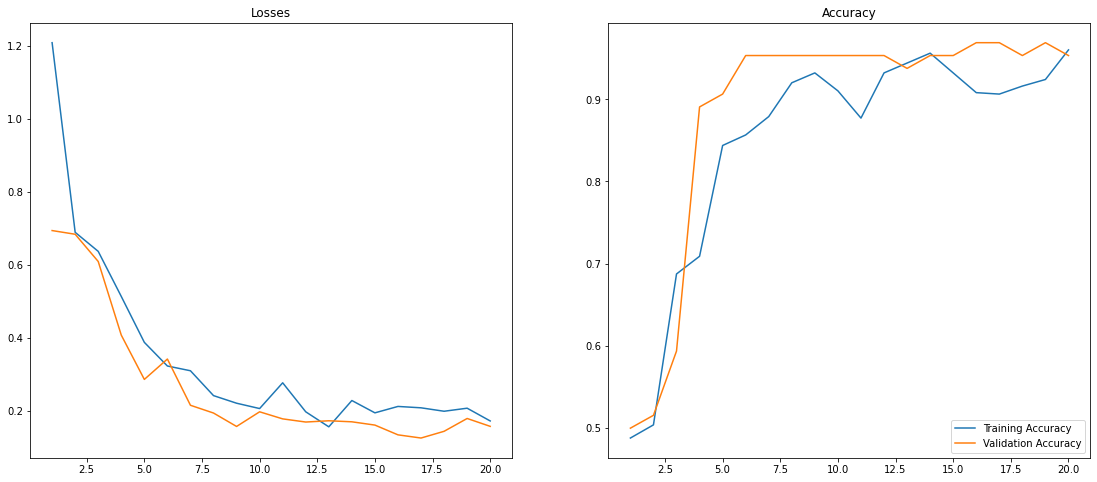

In [ ]:

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1,e+1)

plt.figure(figsize=(19,8))
plt.subplot(121)
plt.plot(epochs,train_loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Losses')

plt.subplot(122)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Accuracy')

plt.legend()

In [ ]:
model.evaluate_generator(training_data)

[0.10905626912911733, 0.964539]

In [ ]:
model.evaluate_generator(val_data)

[0.18241364260514578, 0.9375]

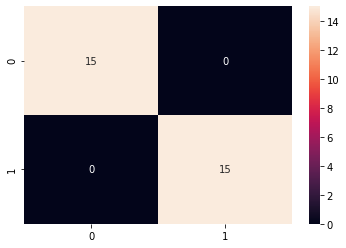

In [ ]:
import cv2
import os
import seaborn as sns
from tensorflow.keras.models import load_model

TP = 0
TN = 0
FP = 0
FN = 0

model = load_model('covid.h5')

covid_images = os.listdir('Test/COVID')
normal_images = os.listdir('Test/NORMAL')

for i in covid_images:
  img = cv2.imread('Test/COVID/'+i)
  img = cv2.resize(img, (224, 224))
  img = img.reshape(1, 224, 224, 3)
  img = img/255.0
  pred = model.predict(img)
  if pred<0.5:
    TP+=1
  else:
    FN+=1

for i in normal_images:
  img = cv2.imread('Test/NORMAL/'+i)
  img = cv2.resize(img, (224, 224))
  img = img.reshape(1, 224, 224, 3)
  img = img/255.0
  pred = model.predict(img)
  if pred>0.5:
    TN+=1
  else:
    FP+=1
  
sns.heatmap([[TP,FP],[FN,TN]],annot=True)